## Hierarchical Clustering

Los algoritmos de clustering jerárquico crean una jerarquía de agrupamiento donde cada nodo es un grupo que recursivamente crea clusters hasta alcanzar un cluster por elemento. Generalmente se dividen en dos tipos: 


- **Divisivos**: van de arriba hacia abajo, por lo que comienza con un cluster de todos los patrones y lo divide hacia abajo en clusters más pequeños.


- **Aglomerativos**: van de abajo hacia arriba y cada patrón comienza siendo un cluster, a medida que avanza en la jerarquía los pares de grupos se fusionan.


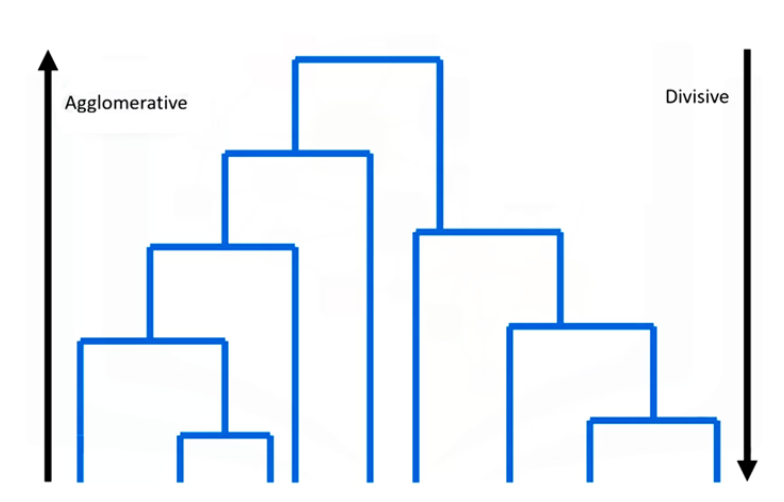


El enfoque más popular entre la comunidad son los algoritmos aglomerativos y una de las principales herramientas para poder representar graficamente este tipo de algoritmos es el **Dendrograma**.

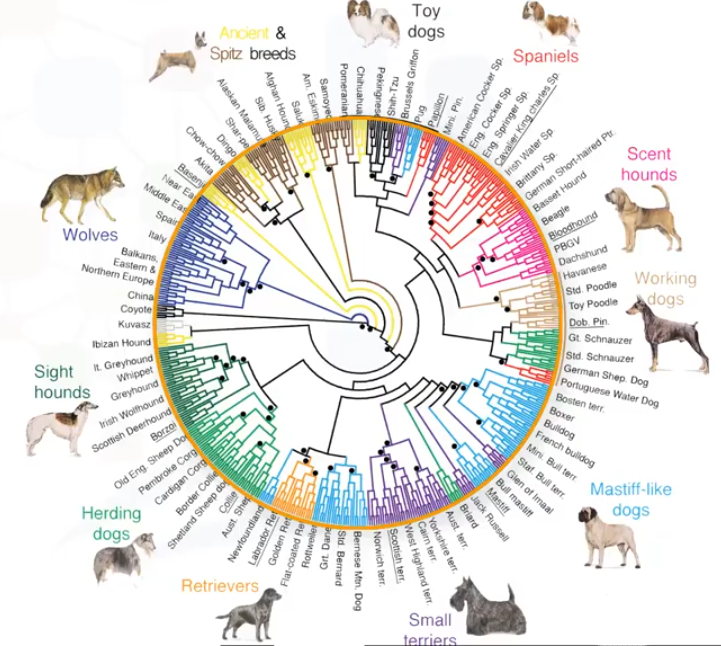

**Algoritmo de `AgglomerativeClustering()`**:

1. Crear **n_clusters**, uno para cada patrón.
2. Calcular la matriz de distancias entre cada punto y el resto.
3. Combinar los dos clusters más cercanos.
4. Actualizar la matriz de distancias.
5. Repetir paso **3** y **4** hasta tener un solo clúster.

_**Documentación:** https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

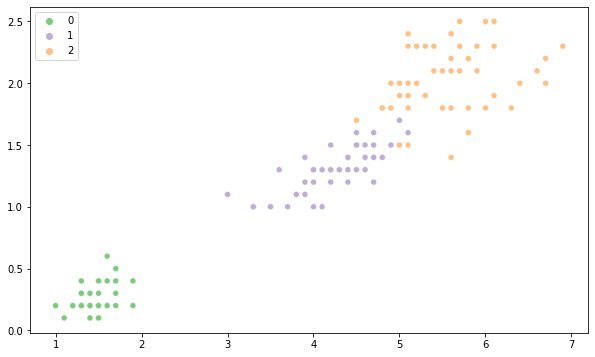

In [3]:
plt.figure(figsize = (10, 6))

# Datos Originales
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = y, palette = "Accent")
plt.show()

In [5]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X[:10]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ]])

### Clustering

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = "complete")
agglom.fit(X)

AgglomerativeClustering(linkage='complete', n_clusters=3)

### Etiquetas

In [8]:
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int64)

In [9]:
Counter(agglom.labels_)

Counter({0: 50, 2: 66, 1: 34})

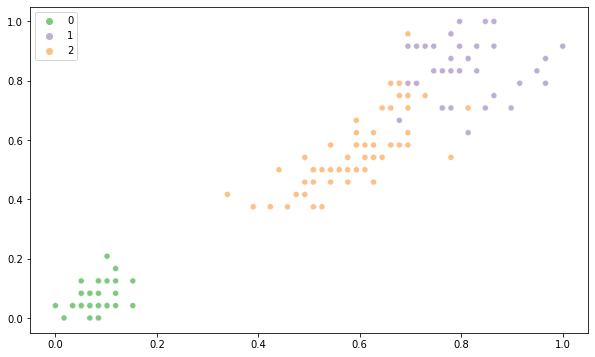

In [10]:
plt.figure(figsize = (10, 6))

# Datos de AgglomerativeClustering
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = agglom.labels_, palette = "Accent")
plt.show()

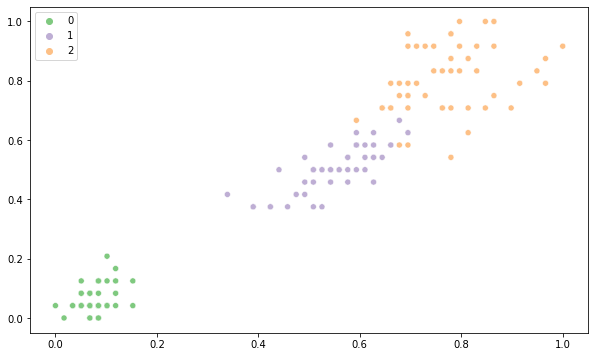

In [11]:
plt.figure(figsize = (10, 6))

# Datos Originales
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = y, palette = "Accent")
plt.show()

### Parámetros del Modelo (Tuning)

#### Parametros de AgglomerativeClustering()

- **`n_clusters`**: int or None, **default** = 2
    - El número de clusters a encontrar.
    - Si el parámetro **`distance_threshold`** es **None**, entonces **`n_clusters`** debe ser **None**.
___

- **`affnity`**: str, **default** = "euclidean"
    - Métrica utilizada para calcular el vínculo.
    - Puede tomar los valores de {"euclidean", "l1", "l2", "manhattan", "cosine"}.
___

- **`linkage`**: {"ward", "complete", "average", "single"}, **default** = "ward"
    - El criterio de vinculación a utilizar.
    - El criterio de vinculación determina qué distancia usar entre conjuntos de observación. El algoritmo fusionará los pares de clusters que minimizan este criterio.
    - "ward" minimiza la varianza de los grupos que se fusionan.
    - "average" usa el promedio de las distancias de cada observación de los dos conjuntos.
    - "complete" utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.
    - "single" utiliza el mínimo de las distancias entre todas las observaciones de los dos conjuntos.
    
___

- **`distance_threshold`**: float, **`default`** = None
    - El umbral de distancia de vinculación por encima del cual los clusters no se fusionarán.
    - Si es **None**, **`n_clusters`** debe ser **None**.
    
___

- **`compute_distances`**: bool, **`default`** = False
    - Calcula las distancias entre los clusters incluso si no se utiliza el **`distance_threshold`**.
    - Esto se puede usar para hacer la visualización de dendrogramas, pero consume más tiempo y recursos para ser calculado.
    
    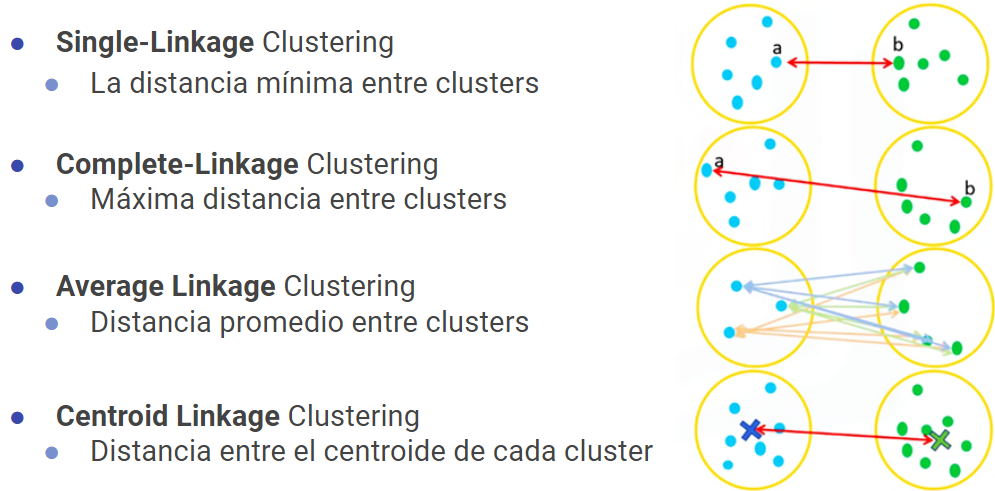

## Dendrograma

Para poder graficar el dendrograma vamos a usar la libreria de **SciPy**.

### Matriz de Distancias

Calcula las distancias entre un elemento y el resto.

In [12]:
from scipy.spatial import distance_matrix 

dist_matrix = distance_matrix(X, X)

pd.DataFrame(dist_matrix)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,0.215614,0.168101,0.217612,0.050077,0.210362,0.150872,0.052868,0.316715,0.181349,...,1.253929,1.198616,1.021731,1.259354,1.286098,1.192217,1.076460,1.082571,1.149071,0.964628
1,0.215614,0.000000,0.101578,0.094699,0.251538,0.411637,0.190941,0.169814,0.145004,0.061315,...,1.264423,1.212139,0.986478,1.277829,1.309655,1.196014,1.033770,1.083907,1.176198,0.956495
2,0.168101,0.101578,0.000000,0.060472,0.187108,0.366632,0.098689,0.122629,0.151184,0.087794,...,1.296852,1.247253,1.026317,1.309112,1.336018,1.232134,1.085179,1.120887,1.195445,0.988597
3,0.217612,0.094699,0.060472,0.000000,0.236719,0.410594,0.132847,0.167244,0.101578,0.093169,...,1.289753,1.243427,1.006445,1.302682,1.331306,1.225119,1.067305,1.111784,1.189842,0.974109
4,0.050077,0.251538,0.187108,0.236719,0.000000,0.193651,0.145004,0.085040,0.335927,0.214937,...,1.270207,1.216904,1.041644,1.274807,1.299304,1.210761,1.102050,1.101560,1.159016,0.981184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.192217,1.196014,1.232134,1.225119,1.210761,1.117888,1.215452,1.187297,1.261096,1.218725,...,0.089825,0.071483,0.325868,0.147623,0.172486,0.000000,0.290990,0.136790,0.219584,0.305078
146,1.076460,1.033770,1.085179,1.067305,1.102050,1.051781,1.086448,1.060506,1.086448,1.062142,...,0.358595,0.344010,0.162855,0.394216,0.447251,0.290990,0.000000,0.222204,0.416858,0.240358
147,1.082571,1.083907,1.120887,1.111784,1.101560,1.015059,1.105842,1.075717,1.148624,1.104211,...,0.192864,0.173188,0.235493,0.208783,0.263241,0.136790,0.222204,0.000000,0.226928,0.187108
148,1.149071,1.176198,1.195445,1.189842,1.159016,1.054893,1.162589,1.146159,1.232342,1.192999,...,0.194423,0.236684,0.357461,0.204705,0.174803,0.219584,0.416858,0.226928,0.000000,0.284096


### Calculo de Clustering
Aquí vamos a usar el modelo **`hierarchy.linkage()`** de la libreria **SciPy**.

In [13]:
# Omitir Warning
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter

simplefilter("ignore", ClusterWarning)


from scipy.cluster import hierarchy

# Algoritmo de Clustering
Z = hierarchy.linkage(y = dist_matrix, method = "complete", metric = "euclidean")

pd.DataFrame(Z)

# A diferencia del modelo de Sklearn, esta función no nos pide el número de clusters

,0,1,2,3
0,101.0,142.0,0.000000,2.0
1,30.0,34.0,0.112675,2.0
2,2.0,47.0,0.123932,2.0
3,120.0,143.0,0.126826,2.0
4,28.0,39.0,0.128852,2.0
...,...,...,...,...
144,275.0,284.0,3.483498,23.0
145,290.0,294.0,4.967180,62.0
146,280.0,292.0,5.384320,38.0
147,295.0,296.0,7.997507,100.0


In [14]:
from scipy.cluster.hierarchy import leaves_list

leaves_list(Z)

# Retorna el orden de las "hojas" usado para graficar el dendrograma.

array([ 42,   2,  47,   3,  12,  30,  34,   9,  29,  25,   1,  45,  22,
        24,  11,   7,  49,   6,  35,   4,  37,  36,  28,  39,   0,  40,
        17,  27,  23,  43,  26,  20,  31,  16,   5,  18,  10,  48,  19,
        46,  21,  44,  15,  32,  14,  33,  41,  13,   8,  38,  85,  51,
        56,  50,  52,  65,  58,  75,  76,  86, 113, 121, 101, 142,  70,
       149, 127, 138, 123, 126,  54, 133,  83,  72, 134,  74,  97,  61,
        91,  63,  78,  66,  84,  71,  73, 106,  87,  68, 119,  60,  98,
        57,  93,  64,  88,  95,  55,  96,  99,  94,  82,  92,  53,  62,
        79,  80,  81,  67,  69,  59,  89,  90, 109, 117, 131, 118, 122,
       105, 135, 140, 120, 143, 136, 100, 144, 129, 107, 130, 102, 125,
       146, 103, 111, 110, 147,  77, 116, 137, 115, 148, 124, 141, 112,
       139, 104, 145, 114, 108, 128, 132], dtype=int32)

### Dendrograma

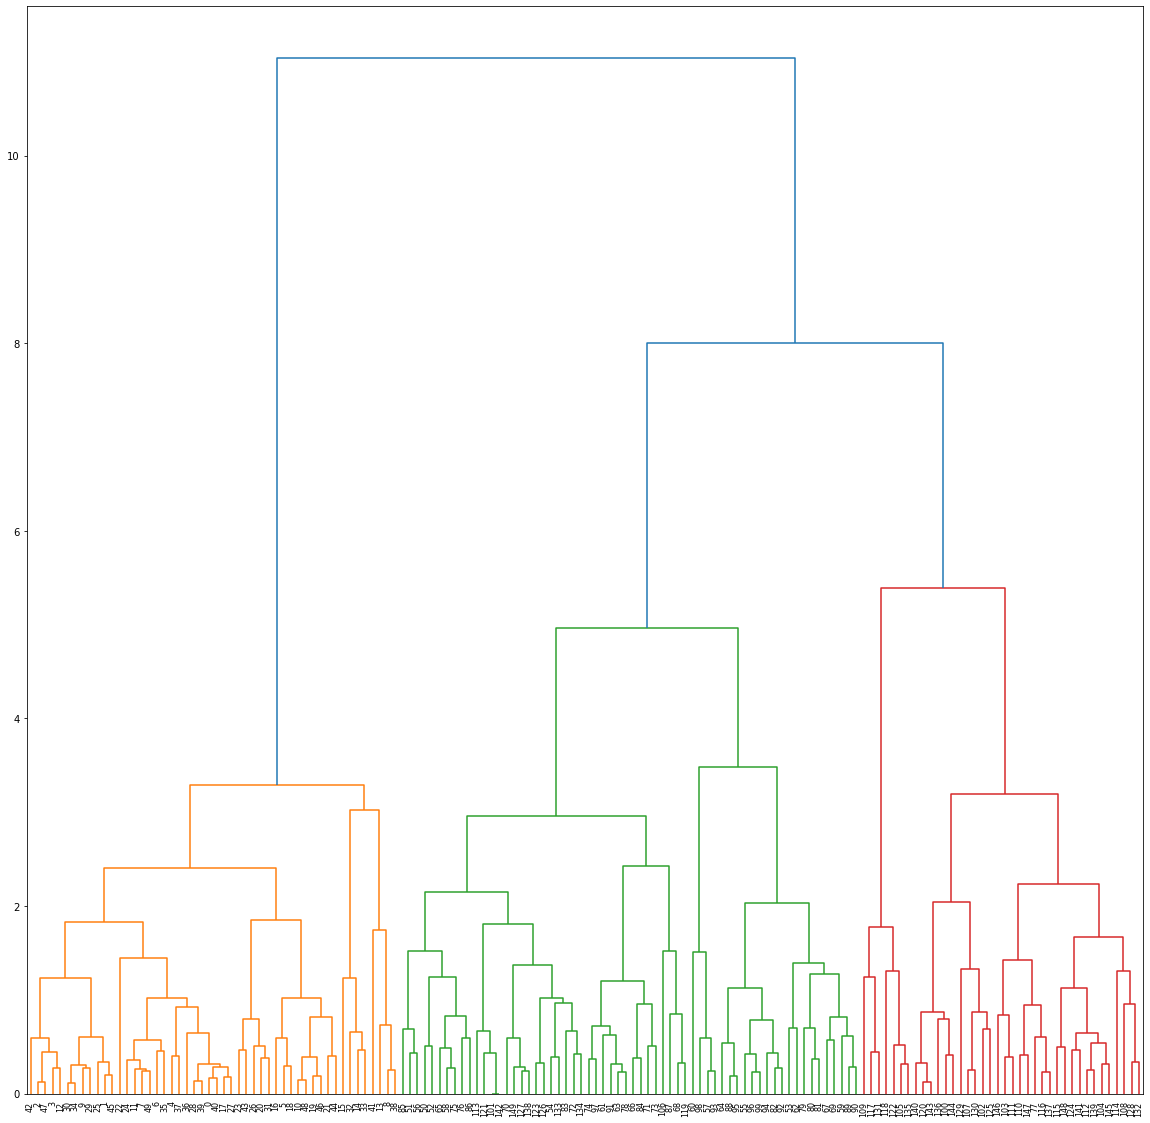

In [16]:
plt.figure(figsize = (20, 20))

dendrograma = hierarchy.dendrogram(Z = Z, orientation = "top")

plt.tick_params(axis = "x", labelsize = 8)

### Etiquetas

In [21]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(Z = Z, t = 6, criterion = "distance")

labels

# El parámetro t es el nivel del dendrograma por el cual va a "cortar".

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2], dtype=int32)

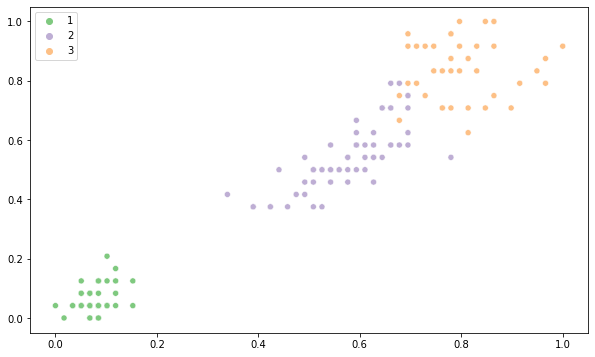

In [18]:
plt.figure(figsize = (10, 6))

# Datos de hierarchy.linkage
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = labels, palette = "Accent")
plt.show()

In [ ]:
################################################################################################################################

### Ejemplo: Market Segmentation

In [22]:
df = pd.read_csv("../Data/market_segmetation.csv")

df.drop("Id", axis = 1, inplace = True)

df.head(3)

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad
0,40.900749,95.40,0.00,95.4,0.166667,0.083333,1000.0,201.802084,139.509787,12
1,3202.467416,0.00,0.00,0.0,0.000000,0.000000,7000.0,4103.032597,1072.340217,12
2,2495.148862,773.17,773.17,0.0,1.000000,0.000000,7500.0,622.066742,627.284787,12


In [23]:
df.drop_duplicates(inplace = True) 

df.shape

(8636, 10)

In [24]:
stast = df.describe()
stast

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,1025.433874,604.901438,420.843533,0.496000,0.368820,4522.091030,1784.478099,864.304943,11.534391
std,2095.571300,2167.107984,1684.307803,917.245182,0.401273,0.398093,3659.240379,2909.810090,2372.566350,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,6.000000
25%,148.095189,43.367500,0.000000,0.000000,0.083333,0.000000,1600.000000,418.559237,169.163545,12.000000
50%,916.855459,375.405000,44.995000,94.785000,0.500000,0.166667,3000.000000,896.675701,312.452292,12.000000
75%,2105.195853,1145.980000,599.100000,484.147500,0.916667,0.750000,6500.000000,1951.142090,825.496463,12.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,1.000000,1.000000,30000.000000,50721.483360,76406.207520,12.000000


In [25]:
columns_to_filter = ['Balance', 
                     'CantidadComprasRealizadas' ,
                     'CompraMasAltaRealizada' ,
                     'CompraMasAltaRealizadaPlazos',
                     'LimiteCredito',
                     'Pagos',
                     'PagoMinimo'
                    ]
for col in columns_to_filter:
    
    df = df[df[col] <= (stast.loc['75%',col] - stast.loc['25%', col])*3]
    
# df = df[df["Balance"] < 6000]
# df = df[df["CantidadComprasRealizadas"] <= 3000]
# df = df[df["CompraMasAltaRealizada"] < 1500]
# df = df[df["CompraMasAltaRealizadaPlazos"] < 1500]
# df = df[df["LimiteCredito"] < 20000]
# df = df[df["Pagos"] < 8000]
# df = df[df["PagoMinimo"] < 3000]

df.drop("Anualidad", axis = 1, inplace = True)

df.shape

(6463, 9)

In [26]:
X = df.values

X.shape

(6463, 9)

### Preprocesamiento

In [27]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.00696989, 0.03040928, 0.        , ..., 0.05923345, 0.04392936,
        0.07093336],
       [0.54573185, 0.        , 0.        , ..., 0.47735192, 0.89337848,
        0.54529351],
       [0.42519783, 0.24645225, 0.43030627, ..., 0.51219512, 0.13543727,
        0.31897525],
       ...,
       [0.00398736, 0.04602831, 0.        , ..., 0.05923345, 0.01768502,
        0.0419014 ],
       [0.0022933 , 0.        , 0.        , ..., 0.02439024, 0.01143138,
        0.02834294],
       [0.06351311, 0.34847954, 0.60844617, ..., 0.07317073, 0.01374278,
        0.04488669]])

### Usando SciPy

### Dendrograma

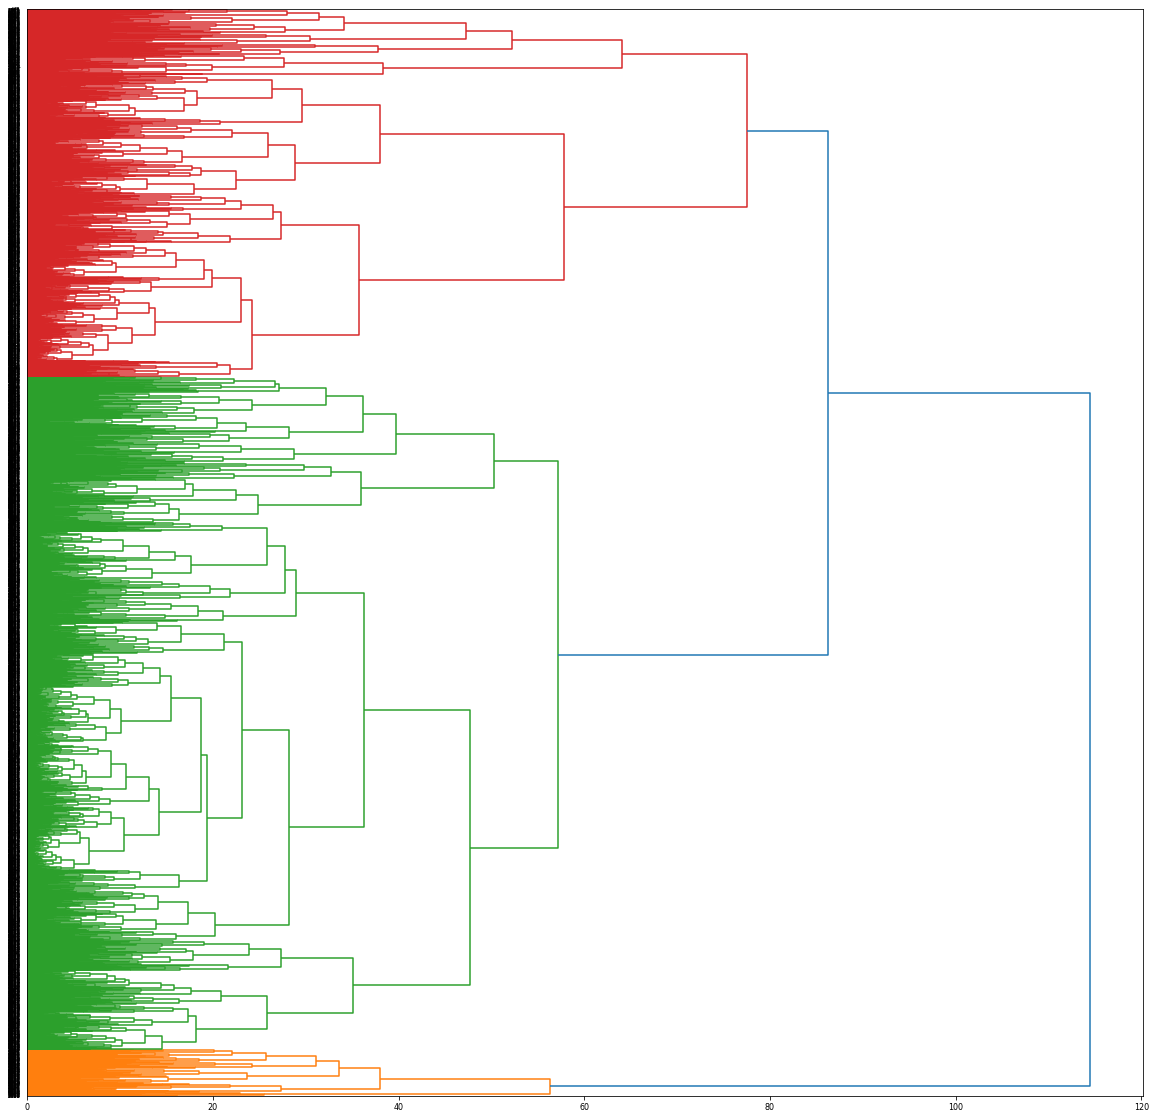

In [28]:
# Matriz de Diatancias
dist_matrix = distance_matrix(X, X)


# Algoritmo de Clustering
Z = hierarchy.linkage(y = dist_matrix, method = "complete", metric = "euclidean")

# Dedrograma
plt.figure(figsize = (20, 20))

dendrograma = hierarchy.dendrogram(Z = Z, orientation = "right")

plt.tick_params(axis = "x", labelsize = 8)

### Etiquetas

In [29]:
labels = fcluster(Z = Z, t = 80, criterion = "distance")

Counter(labels)

Counter({2: 3999, 3: 2187, 1: 277})

### Usando Sklearn

In [39]:
# Modelo

agglom = AgglomerativeClustering(n_clusters = 6, linkage = "complete")
agglom.fit(X)

Counter(agglom.labels_)

Counter({2: 3771, 4: 327, 1: 1809, 0: 400, 5: 52, 3: 104})

In [32]:
df['cluster'] = labels

In [33]:
df.head()

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,cluster
0,40.900749,95.40,0.00,95.4,0.166667,0.083333,1000.0,201.802084,139.509787,2
1,3202.467416,0.00,0.00,0.0,0.000000,0.000000,7000.0,4103.032597,1072.340217,3
2,2495.148862,773.17,773.17,0.0,1.000000,0.000000,7500.0,622.066742,627.284787,3
3,817.714335,16.00,16.00,0.0,0.083333,0.000000,1200.0,678.334763,244.791237,2
6,1823.652743,436.20,0.00,436.2,1.000000,1.000000,2300.0,679.065082,532.033990,3


In [36]:
df.groupby('cluster').mean()

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo
cluster,,,,,,,,,
1,1670.573181,1871.349170,952.360866,918.988303,0.959479,0.869854,5848.490318,1908.057127,663.768859
2,1098.774672,245.471780,188.709970,56.885186,0.207225,0.082195,3342.260717,850.610664,409.307545
3,939.596193,692.639849,256.670997,436.634284,0.821314,0.710269,3684.289511,937.712056,413.523967


In [40]:
df['cluster_agg'] = agglom.labels_

In [41]:
df.groupby('cluster_agg').mean()

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,cluster
cluster_agg,,,,,,,,,,
0,1555.438453,1281.928300,1033.586625,248.341675,0.786428,0.322787,4998.425000,1676.369021,590.671465,2.410000
1,573.884011,665.430575,151.734080,514.041708,0.900720,0.838215,3210.083561,778.951130,323.340845,2.857380
2,986.440458,234.460639,176.455961,58.267388,0.193275,0.080643,3279.615647,813.425141,365.131074,2.033943
3,847.598517,2219.623365,1351.547404,868.075962,0.910504,0.776391,5404.152098,2587.647367,316.435663,1.326923
4,3900.670854,248.993119,128.861254,121.151774,0.226057,0.140063,5903.363914,1524.633886,1354.791909,2.516820
5,3226.488849,1958.862308,841.519423,1117.342885,0.947222,0.902091,7250.000000,1271.790718,981.423925,1.384615


In [ ]:
################################################################################################################################